<a href="https://colab.research.google.com/github/sai-krishna-k/bird-bones-and-their-classification/blob/main/Project_6220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Python Modules**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## **Upload File**

In [52]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/sai-krishna-k/bird-bones-and-their-classification/main/birds%20bones%20and%20their%20class.csv')
df.head(n=10)
df.fillna(df.median(), inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                420 non-null    int64  
 1   Length of Humerus (mm)            420 non-null    float64
 2   Diameter of Humerus (mm)          420 non-null    float64
 3   Length of Ulna (mm)               420 non-null    float64
 4   Diameter of Ulna (mm)             420 non-null    float64
 5   Length of Femur (mm)              420 non-null    float64
 6   Diameter of Femur (mm)            420 non-null    float64
 7   Length of Tibiotarsus (mm)        420 non-null    float64
 8   Diameter of Tibiotarsus (mm)      420 non-null    float64
 9   Length of Tarsometatarsus (mm)    420 non-null    float64
 10  Diameter of Tarsometatarsus (mm)  420 non-null    float64
 11  class                             420 non-null    int64  
dtypes: float

### **Classes**

In [55]:
y = df['class']
print(y.shape)
target = df['class'].to_numpy()
target.shape

(420,)


(420,)

### **Features**

Data Matrix

In [56]:
X = df.iloc[:11]
X.head(10)
X.shape

(11, 12)

In [6]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,420.0,209.500000,121.387808,0.00,104.7500,209.500,314.2500,419.00
Length of Humerus (mm),420.0,64.601762,53.779546,9.85,25.2050,44.180,90.2200,420.00
Diameter of Humerus (mm),420.0,4.368500,2.851524,1.14,2.1900,3.500,5.8050,17.84
Length of Ulna (mm),420.0,68.933905,58.613103,14.09,28.1325,43.710,97.2050,422.00
Diameter of Ulna (mm),420.0,3.594143,2.181985,1.00,1.8700,2.945,4.7700,12.00
Length of Femur (mm),420.0,36.845071,19.935272,11.83,21.3325,31.130,47.1000,117.07
Diameter of Femur (mm),420.0,3.219214,2.021455,0.93,1.7175,2.520,4.1225,11.64
Length of Tibiotarsus (mm),420.0,64.603095,37.757629,5.50,36.4725,52.120,82.8700,240.00
Diameter of Tibiotarsus (mm),420.0,3.180690,2.078617,0.87,1.5675,2.490,4.2525,11.03
Length of Tarsometatarsus (mm),420.0,39.212143,23.159515,7.77,23.0425,31.740,50.1550,175.00


Notice that the data is not standardizd. So we need to standarize it.

In [7]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,420.0,-6.767074e-17,1.001193,-1.727932,-0.863966,0.000000,0.863966,1.727932
Length of Humerus (mm),420.0,-1.691768e-16,1.001193,-1.019292,-0.733434,-0.380184,0.476925,6.616309
Diameter of Humerus (mm),420.0,0.000000e+00,1.001193,-1.133552,-0.764888,-0.304937,0.504366,4.729949
Length of Ulna (mm),420.0,-1.353415e-16,1.001193,-0.936809,-0.696944,-0.430859,0.482909,6.030856
Diameter of Ulna (mm),420.0,-3.383537e-16,1.001193,-1.190309,-0.791114,-0.297856,0.539536,3.856984
Length of Femur (mm),420.0,-8.458842e-17,1.001193,-1.256311,-0.779075,-0.287023,0.515025,4.029070
Diameter of Femur (mm),420.0,-1.691768e-16,1.001193,-1.133810,-0.743774,-0.346309,0.447382,4.170674
Length of Tibiotarsus (mm),420.0,-3.383537e-16,1.001193,-1.567195,-0.745919,-0.331005,0.484371,4.650877
Diameter of Tibiotarsus (mm),420.0,-2.030122e-16,1.001193,-1.112974,-0.777014,-0.332680,0.516251,3.780720
Length of Tarsometatarsus (mm),420.0,-3.045183e-16,1.001193,-1.359253,-0.699018,-0.323023,0.473063,5.870149


Notice that the data is now standardizd.

**Observations and variables**

In [9]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

## **Data Visualisation**

### Class Distribution

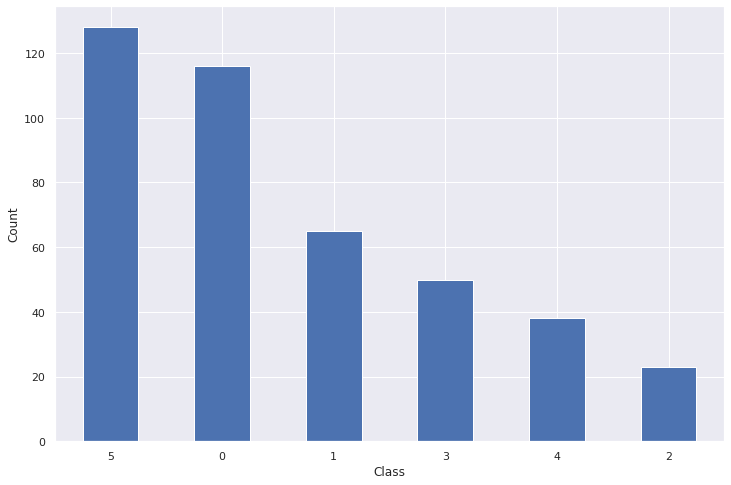

In [10]:
y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Box & Whisker Plots

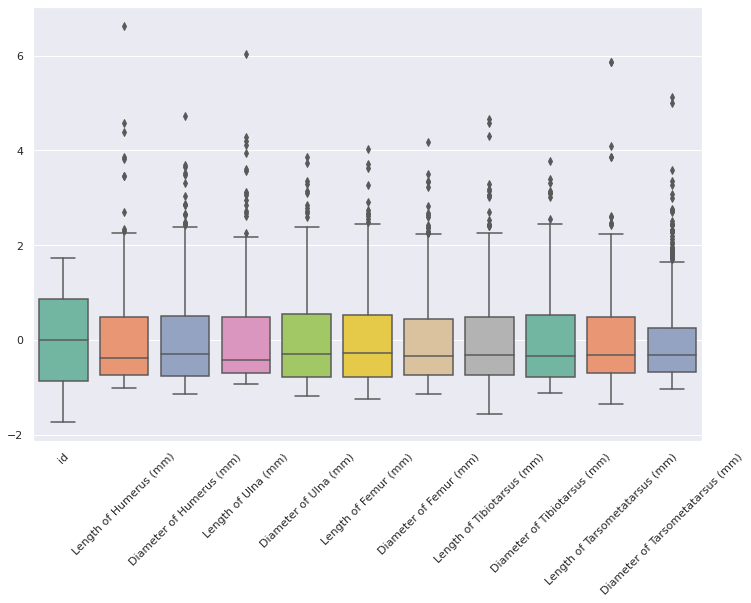

In [11]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


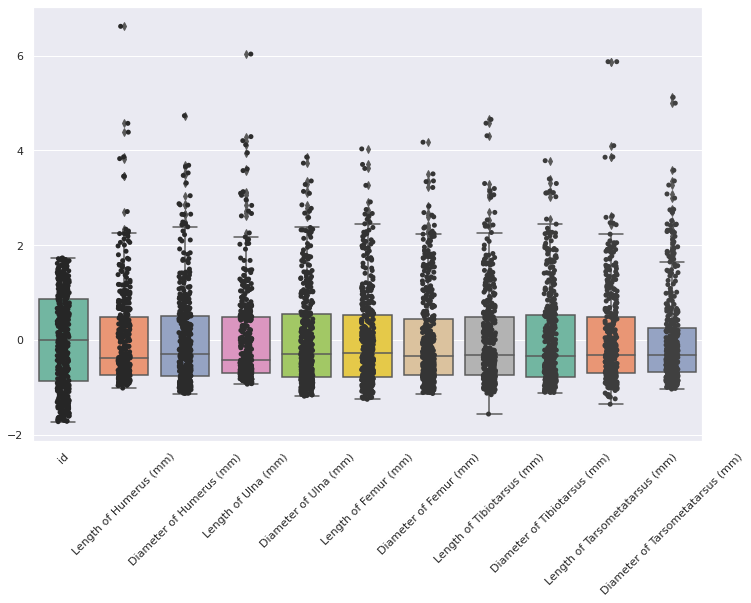

In [12]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

### Five Number Summary

In [13]:
df.describe()

,id,Length of Humerus (mm),Diameter of Humerus (mm),Length of Ulna (mm),Diameter of Ulna (mm),Length of Femur (mm),Diameter of Femur (mm),Length of Tibiotarsus (mm),Diameter of Tibiotarsus (mm),Length of Tarsometatarsus (mm),Diameter of Tarsometatarsus (mm)
count,4.200000e+02,4.200000e+02,420.000000,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02
mean,-6.767074e-17,-1.691768e-16,0.000000,-1.353415e-16,-3.383537e-16,-8.458842e-17,-1.691768e-16,-3.383537e-16,-2.030122e-16,-3.045183e-16,-1.353415e-16
std,1.001193e+00,1.001193e+00,1.001193,1.001193e+00,1.001193e+00,1.001193e+00,1.001193e+00,1.001193e+00,1.001193e+00,1.001193e+00,1.001193e+00
min,-1.727932e+00,-1.019292e+00,-1.133552,-9.368095e-01,-1.190309e+00,-1.256311e+00,-1.133810e+00,-1.567195e+00,-1.112974e+00,-1.359253e+00,-1.040183e+00
25%,-8.639659e-01,-7.334340e-01,-0.764888,-6.969442e-01,-7.911139e-01,-7.790750e-01,-7.437740e-01,-7.459193e-01,-7.770138e-01,-6.990184e-01,-6.882363e-01
50%,0.000000e+00,-3.801839e-01,-0.304937,-4.308591e-01,-2.978558e-01,-2.870233e-01,-3.463091e-01,-3.310055e-01,-3.326799e-01,-3.230229e-01,-3.202402e-01
75%,8.639659e-01,4.769246e-01,0.504366,4.829093e-01,5.395359e-01,5.150248e-01,4.473823e-01,4.843707e-01,5.162508e-01,4.730629e-01,2.575482e-01
max,1.727932e+00,6.616309e+00,4.729949,6.030856e+00,3.856984e+00,4.029070e+00,4.170674e+00,4.650877e+00,3.780720e+00,5.870149e+00,5.118307e+00


### Pair Plot

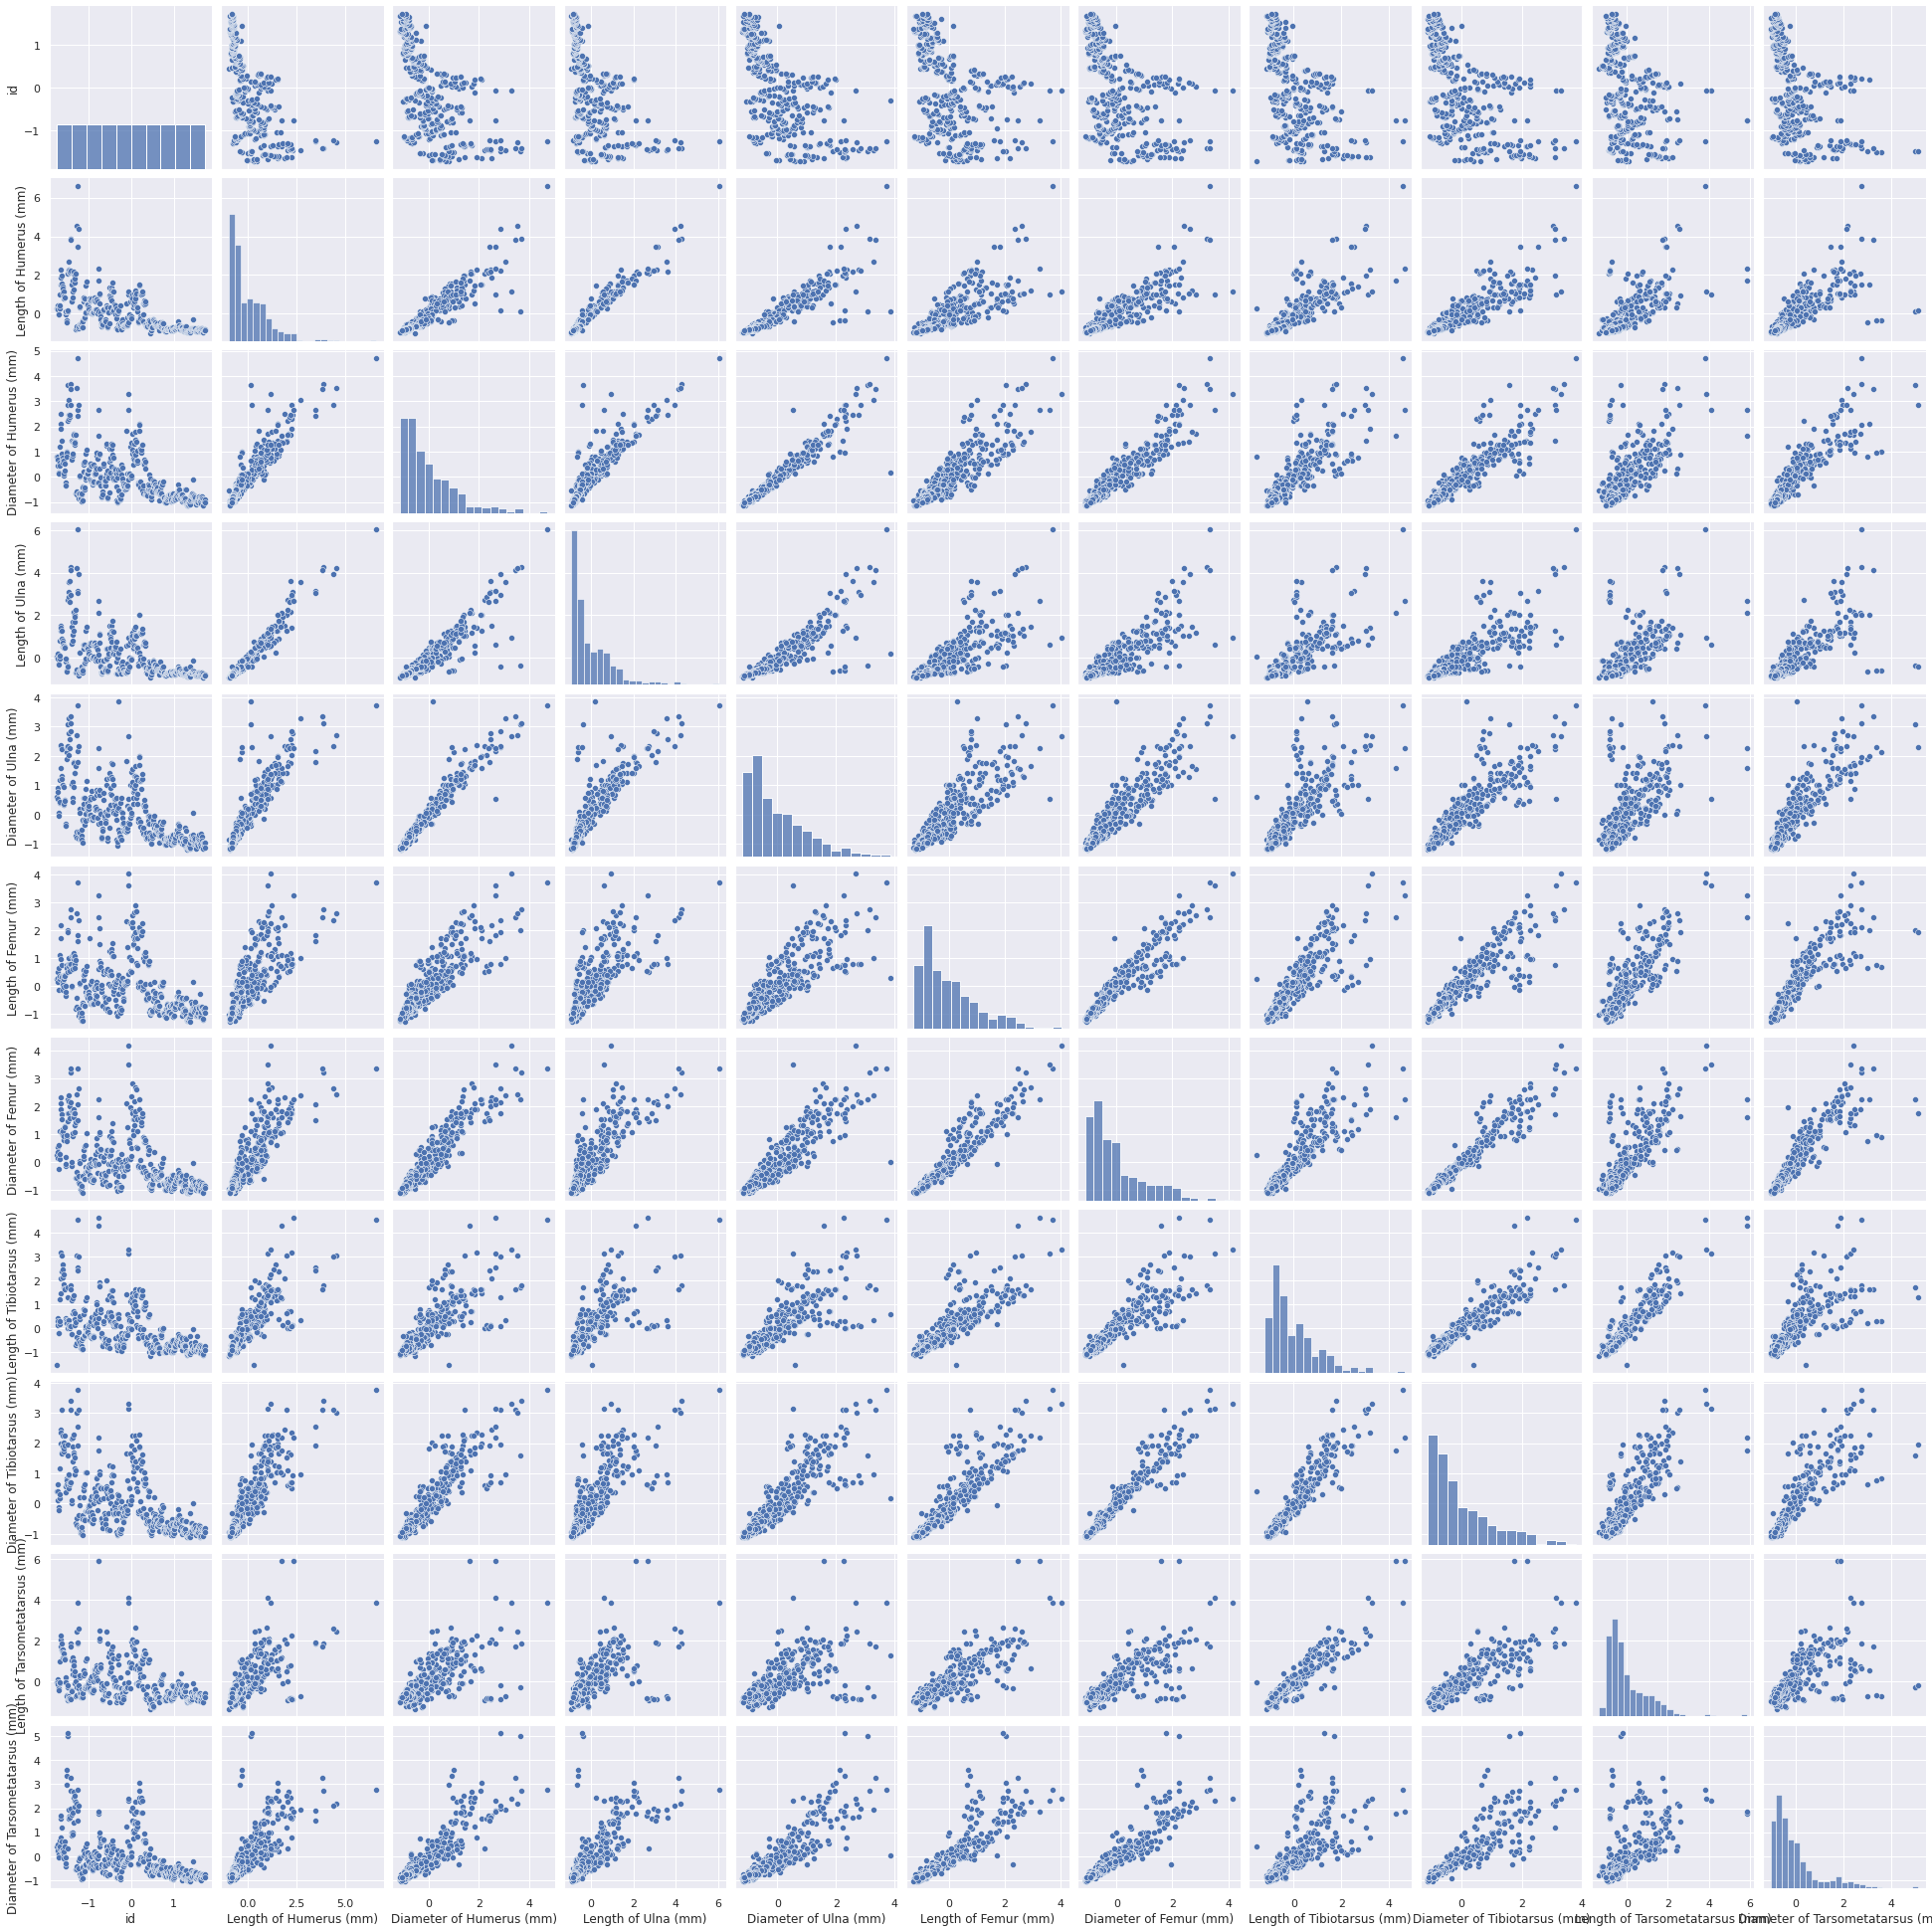

In [14]:
sns.pairplot(df)

## **Covariance**

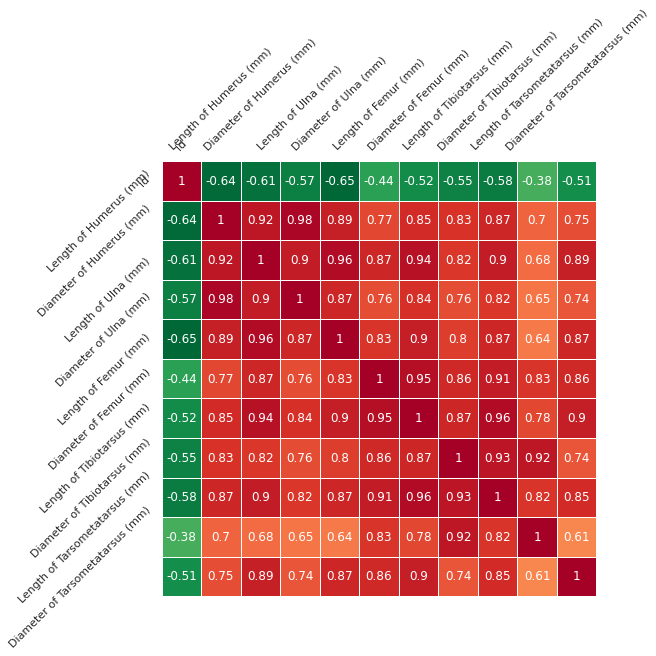

In [15]:
dfc = df - df.mean() #centered data
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=45)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);
#plt.title('Covariance matrix')

## **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

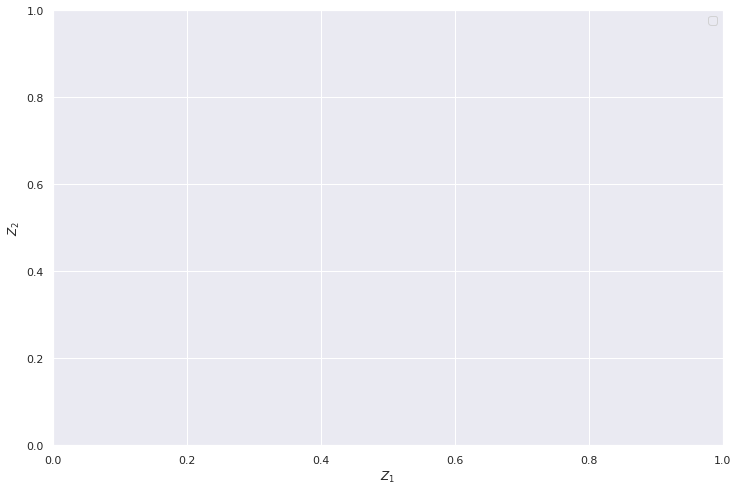

In [16]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

plt. figure()

plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
#for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
#    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
#        textcoords='offset points', ha='right', va='bottom')

### **Eigenvectors**

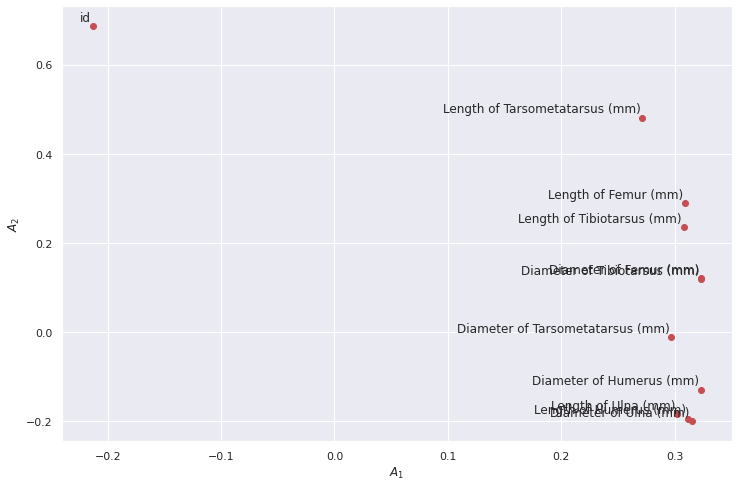

In [17]:
A = pca.components_.T 
#print(f'Eigenvector matrix:\n{A}')

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


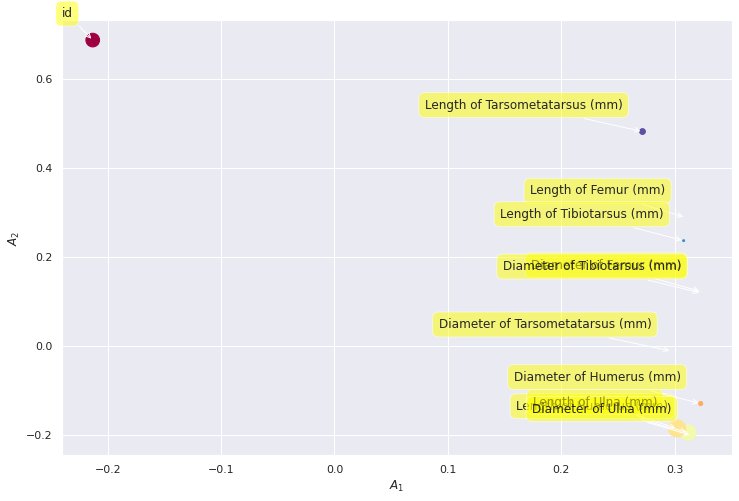

In [18]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

### **Scree plot**

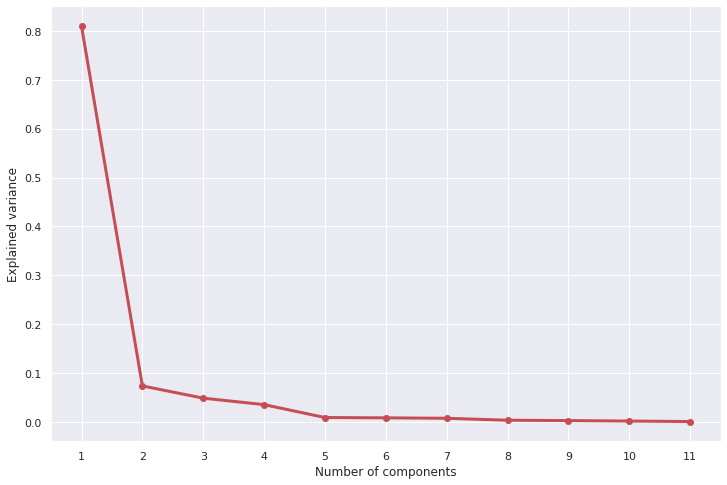

In [19]:
#Eigenvalues
Lambda = pca.explained_variance_ 
#print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()


### **Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

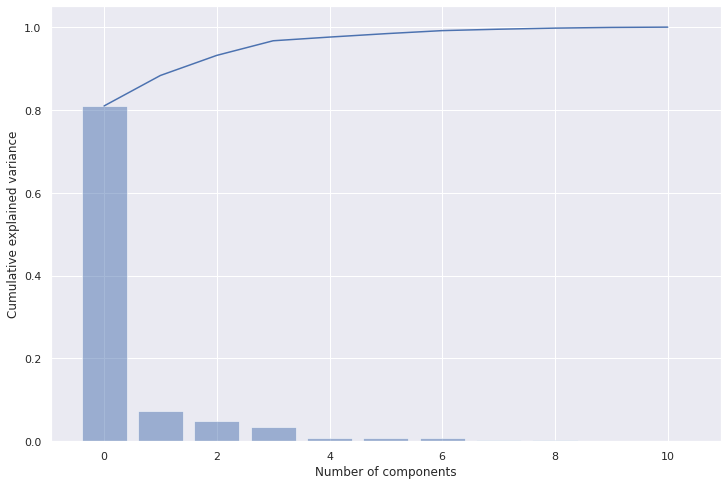

In [20]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Explained Variance per PC**

In [21]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (81.0%)',
 '1': 'PC 2 (7.4%)',
 '2': 'PC 3 (4.8%)',
 '3': 'PC 4 (3.5%)',
 '4': 'PC 5 (0.9%)',
 '5': 'PC 6 (0.8%)',
 '6': 'PC 7 (0.7%)',
 '7': 'PC 8 (0.3%)',
 '8': 'PC 9 (0.3%)',
 '9': 'PC 10 (0.2%)',
 '10': 'PC 11 (0.1%)'}

### **Biplot**

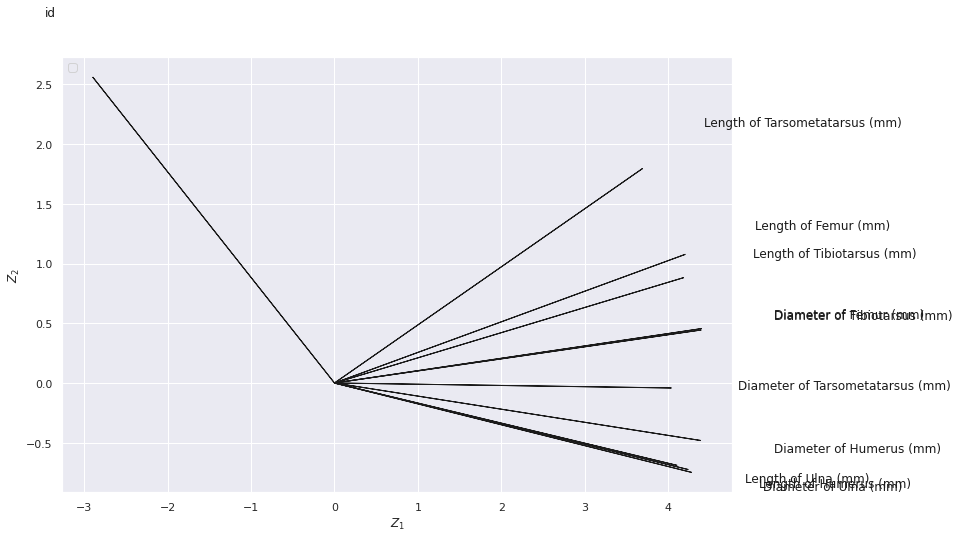

In [22]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.legend(loc='upper left')
#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')
  #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

**Using PCA Librarry**

In [25]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=9863cc2809e8866aa06968478671c259f3909b87109ffaf4001f306dc04916e7
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [26]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(df)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [11] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [11] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [27]:
 # Print the top features. The results show that f1 is best, followed by f2 etc
print(out['topfeat'])

     PC                           feature   loading  type
0   PC1            Diameter of Femur (mm)  0.323758  best
1   PC2                                id  0.686446  best
2   PC3                                id -0.537060  best
3   PC4               Length of Ulna (mm)  0.592128  best
4   PC4            Length of Humerus (mm)  0.481061  weak
5   PC1          Diameter of Humerus (mm)  0.323048  weak
6   PC1             Diameter of Ulna (mm)  0.314974  weak
7   PC1              Length of Femur (mm)  0.309427  weak
8   PC3        Length of Tibiotarsus (mm)  0.372668  weak
9   PC1      Diameter of Tibiotarsus (mm)  0.323524  weak
10  PC3    Length of Tarsometatarsus (mm)  0.489357  weak
11  PC4  Diameter of Tarsometatarsus (mm) -0.439922  weak


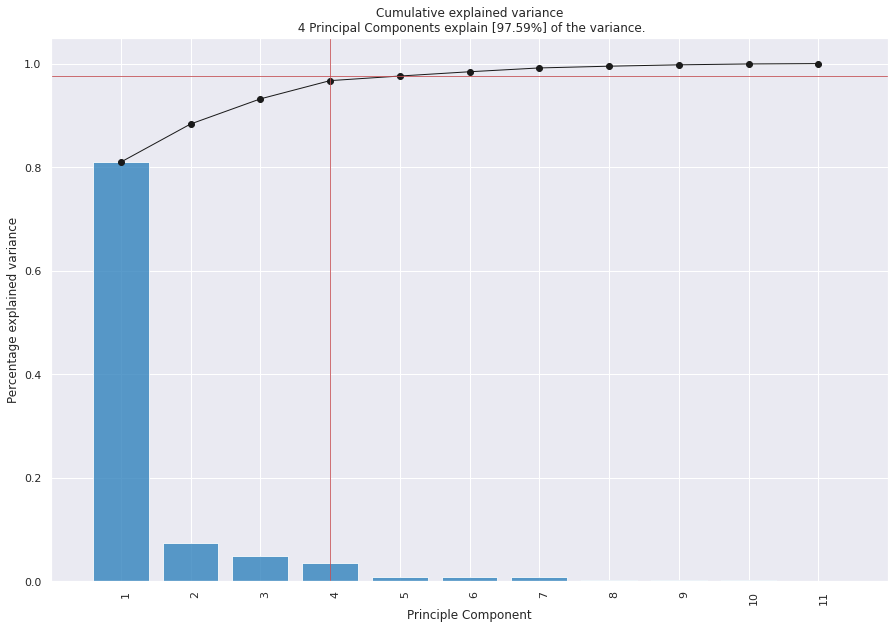

<Figure size 864x576 with 0 Axes>

In [28]:
model.plot();

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [420] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [420] unique colors! Available unique colors: [9].


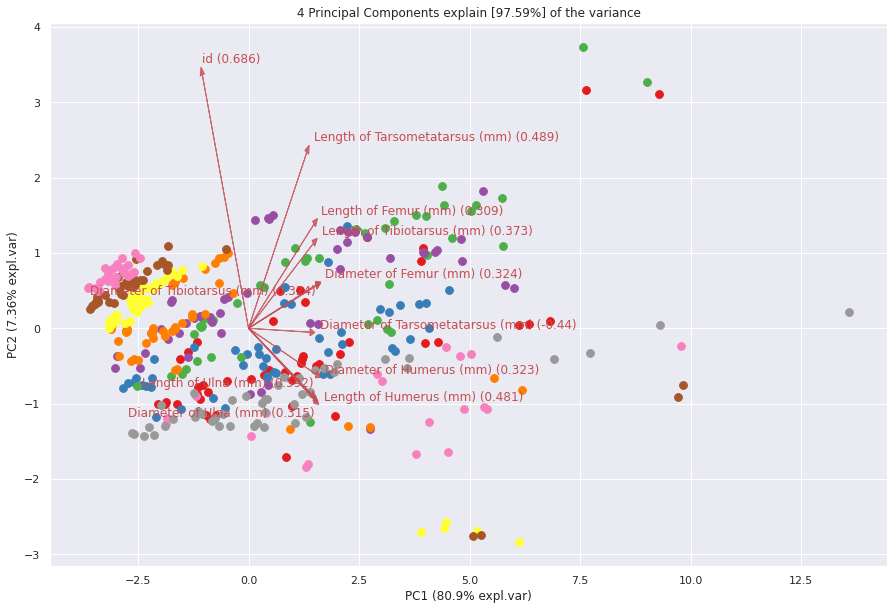

In [29]:
 ax = model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [420] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [420] unique colors! Available unique colors: [9].


(<Figure size 1080x720 with 1 Axes>,
 <Axes: title={'center': '4 Principal Components explain [97.59%] of the variance'}, xlabel='PC1 (80.9% expl.var)', ylabel='PC2 (7.36% expl.var)'>)

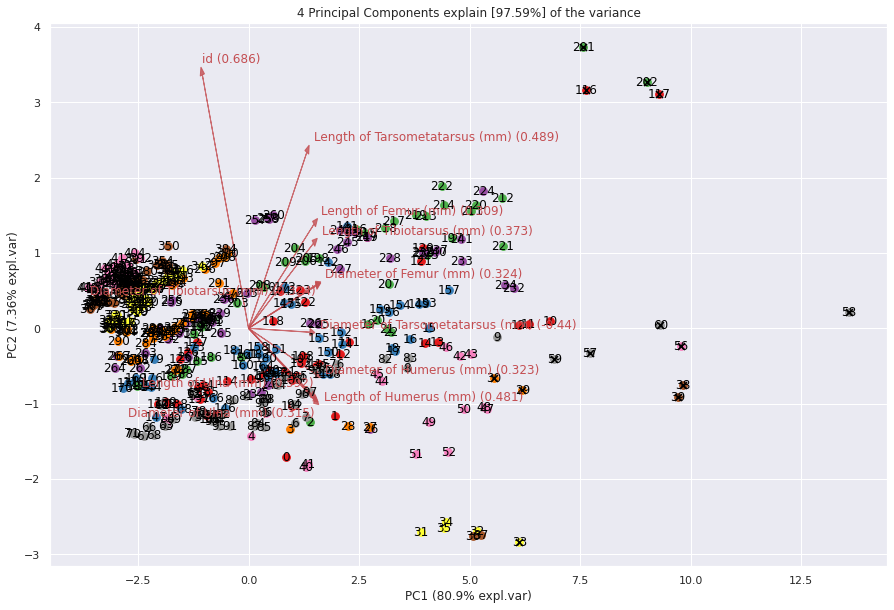

In [30]:
model.biplot(legend=False, hotellingt2=True)

[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 1080x720 with 1 Axes>,
 <Axes: title={'center': '4 Principal Components explain [97.59%] of the variance'}, xlabel='PC1 (80.9% expl.var)', ylabel='PC2 (7.36% expl.var)'>)

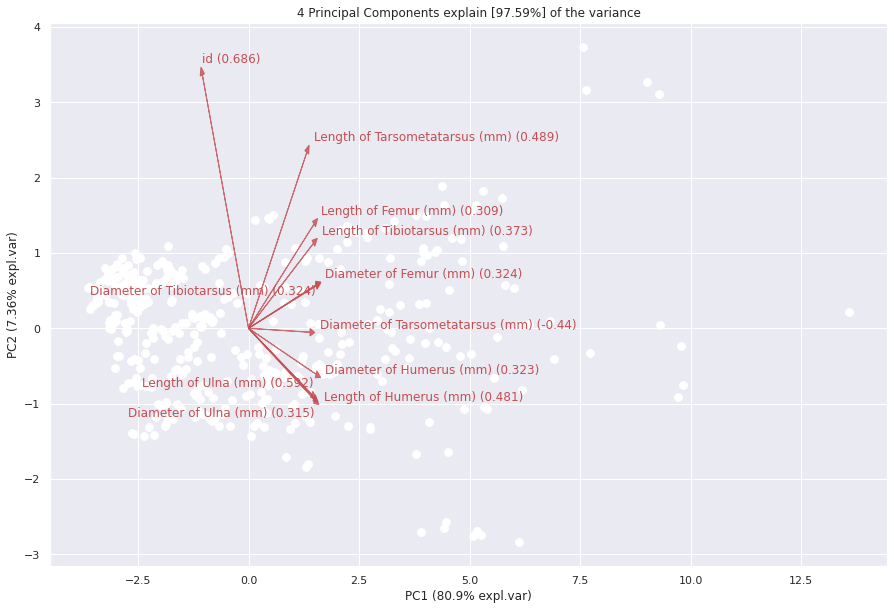

In [31]:
model.biplot(cmap=None, label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [420] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [420] unique colors! Available unique colors: [9].


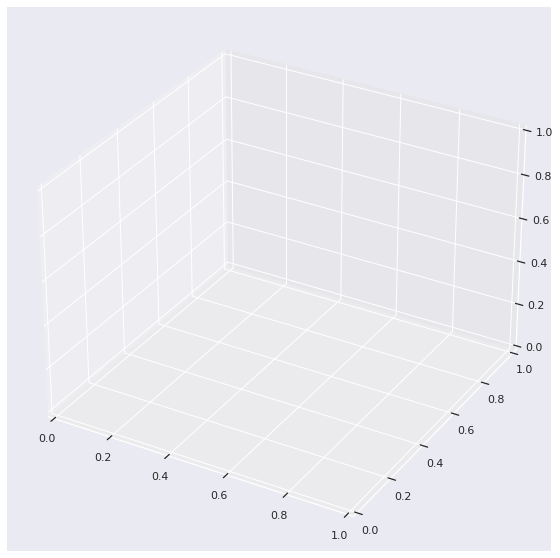

In [32]:
ax = model.biplot3d(legend=False)

### **Principal components**

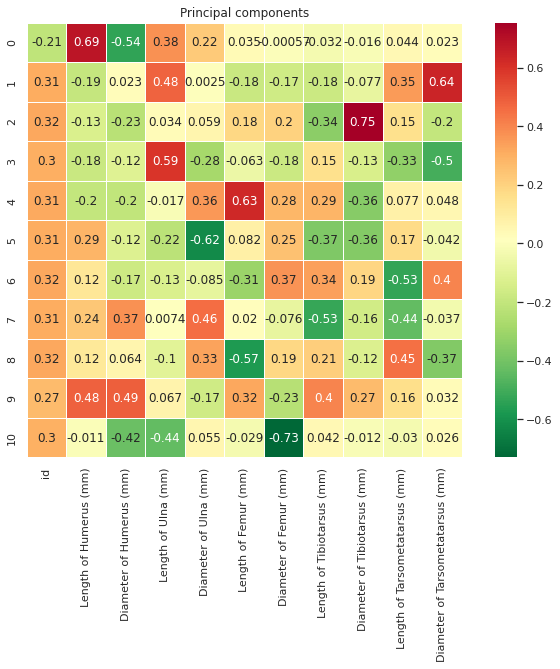

PC1:[-0.2132416   0.31205525  0.32304826  0.30219485  0.31497352  0.30942734
  0.32375793  0.3080404   0.32352394  0.27173405  0.29715117]
PC2:[ 0.68644557 -0.19418574 -0.12901905 -0.18481092 -0.20053176  0.28868204
  0.12210231  0.23645822  0.1189966   0.48127693 -0.01113256]


In [33]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
#ax.tick_params(labelbottom=False,labeltop=True)
plt.xticks(rotation=90)
plt.title('Principal components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')

### **Hotelling's T2 test**

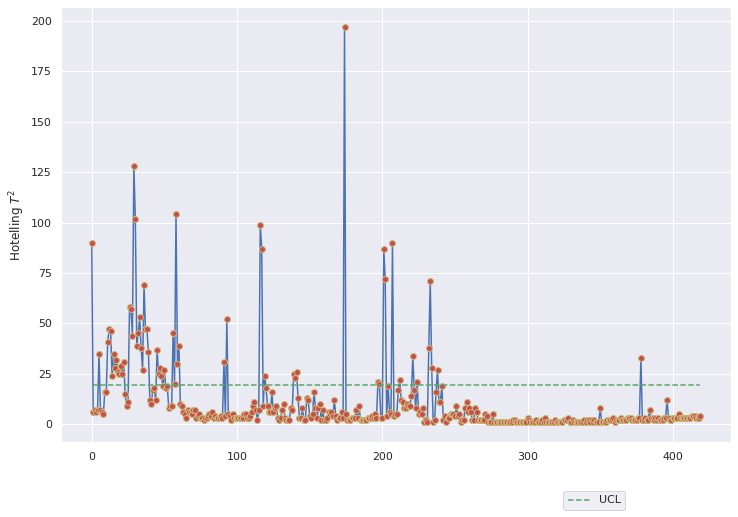

In [34]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

In [45]:
print(np.argwhere(Tsquare>UCL))

[[  0]
 [  5]
 [ 11]
 [ 12]
 [ 13]
 [ 14]
 [ 15]
 [ 16]
 [ 17]
 [ 18]
 [ 19]
 [ 20]
 [ 21]
 [ 22]
 [ 26]
 [ 27]
 [ 28]
 [ 29]
 [ 30]
 [ 31]
 [ 32]
 [ 33]
 [ 34]
 [ 35]
 [ 36]
 [ 37]
 [ 38]
 [ 39]
 [ 45]
 [ 46]
 [ 47]
 [ 48]
 [ 50]
 [ 56]
 [ 57]
 [ 58]
 [ 59]
 [ 60]
 [ 91]
 [ 93]
 [116]
 [117]
 [119]
 [139]
 [140]
 [141]
 [174]
 [197]
 [198]
 [201]
 [202]
 [207]
 [212]
 [221]
 [224]
 [232]
 [233]
 [234]
 [238]
 [378]]


### **Control Charts for Principal Components**

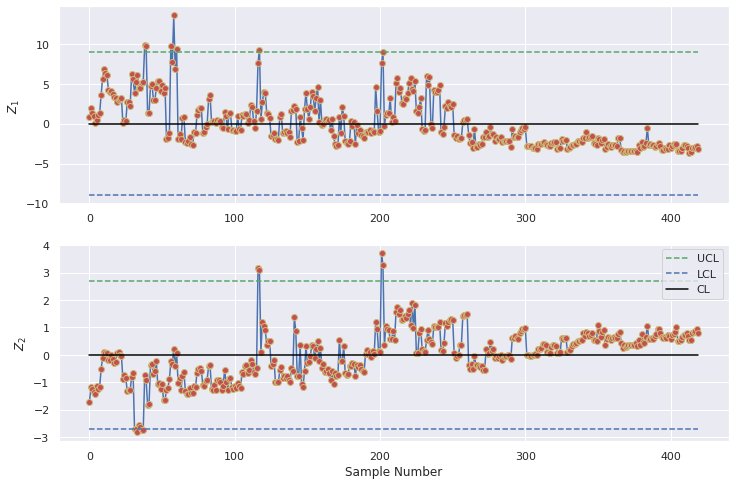

In [36]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('$Z_2$')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()

#### Out of Control Points

In [37]:
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[]
[[ 38]
 [ 39]
 [ 56]
 [ 58]
 [ 60]
 [117]
 [202]]
[[31]
 [33]
 [36]
 [37]]
[[116]
 [117]
 [201]
 [202]]


## **Multi-Class Classification**

In [59]:
# Test-Train Split
# print(y.shape)
# print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0, stratify=y)
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z, y, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], y, test_size=0.3, random_state=0)

# Define the evaluation metric
scoring = ['f1_macro']

Train Dataset Size: 294
Test Dataset Size: 126


### Gaussian Naive Bayes (GNB)

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        35
           1      1.000     1.000     1.000        20
           2      1.000     1.000     1.000         7
           3      1.000     1.000     1.000        15
           4      1.000     1.000     1.000        11
           5      1.000     1.000     1.000        38

    accuracy                          1.000       126
   macro avg      1.000     1.000     1.000       126
weighted avg      1.000     1.000     1.000       126



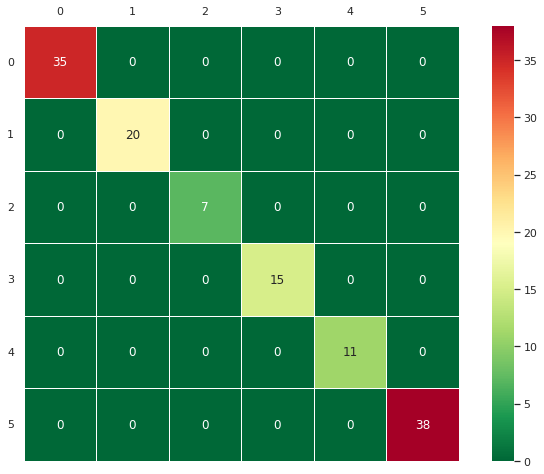

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.955     0.568     0.712        37
           1      0.483     0.667     0.560        21
           2      0.500     0.500     0.500         6
           3      0.846     0.846     0.846        13
           4      0.389     0.778     0.519         9
           5      0.974     0.925     0.949        40

    accuracy                          0.738       126
   macro avg      0.691     0.714     0.681       126
weighted avg      0.809     0.738     0.752       126



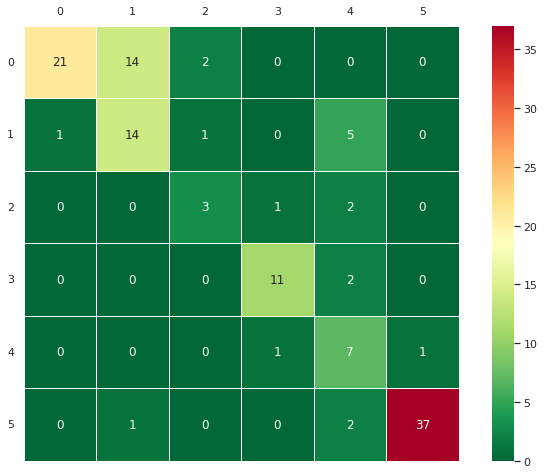

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.800     0.973     0.878        37
           1      0.667     0.190     0.296        21
           2      0.000     0.000     0.000         6
           3      0.455     0.769     0.571        13
           4      0.500     0.889     0.640         9
           5      0.973     0.900     0.935        40

    accuracy                          0.746       126
   macro avg      0.566     0.620     0.553       126
weighted avg      0.738     0.746     0.709       126



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


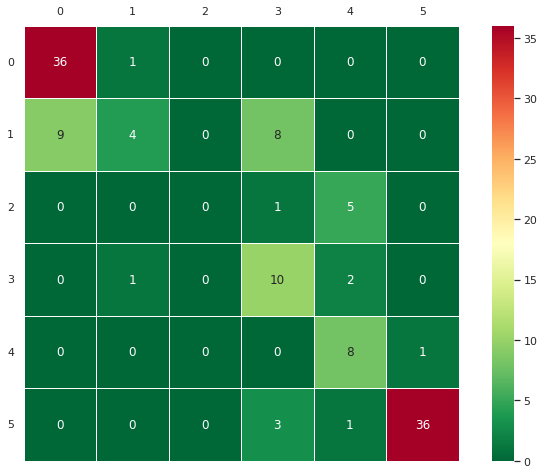

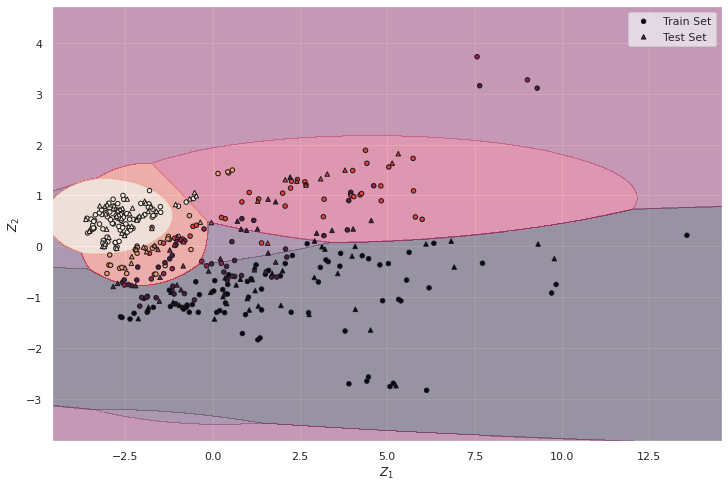

(array([  0,   4,   8,  11,  15,  27,  28,  29,  33,  34,  38,  39,  45,
        46,  47,  48,  52,  54,  64,  65,  66,  87,  93,  94, 100, 106,
       114, 115, 116, 120, 121, 123]),)


In [60]:
gnb = GaussianNB()

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  gnb.fit(Xtr, ytr)
  y_pred = gnb.predict(Xtst)
  gnb_score = gnb.score(Xtst, ytst)
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_gnb = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_gnb, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Naive Bayes Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    print(np.where(ytst != y_pred))

### K Nearest Neighbors (KNN)

Grid Search Results:
k_full_data: {'n_neighbors': 4}
k_Z: {'n_neighbors': 4}
k_Z12: {'n_neighbors': 4}
                                    0         1         2         3         4
knn_full_data fit_time       0.004597  0.003842  0.002579  0.002451  0.004003
knn_Z  fit_time              0.001168  0.001186  0.001055  0.001067  0.001041
knn_Z12 fit_time             0.001244  0.001166  0.002216  0.001382  0.001312
knn_full_data test_f1_macro  0.940990  0.929256  0.877128  0.865278  0.868543
knn_Z  test_f1_macro         0.952381  0.836949  0.853361  0.818428  0.814976
knn_Z12 test_f1_macro        0.679864  0.621784  0.641005  0.607575  0.675570

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        35
           1      0.909     1.000     0.952        20
           2      1.000     0.571     0.727         7
           3      0.833     1.000     0.909        15
           4      1.000     0.818    

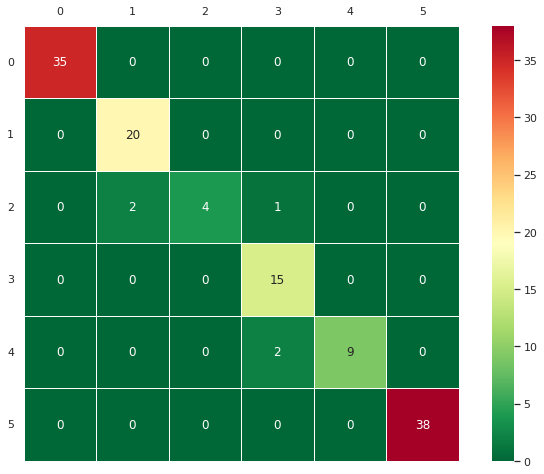

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.925     1.000     0.961        37
           1      0.947     0.857     0.900        21
           2      1.000     0.833     0.909         6
           3      0.923     0.923     0.923        13
           4      1.000     0.778     0.875         9
           5      0.952     1.000     0.976        40

    accuracy                          0.944       126
   macro avg      0.958     0.899     0.924       126
weighted avg      0.946     0.944     0.943       126



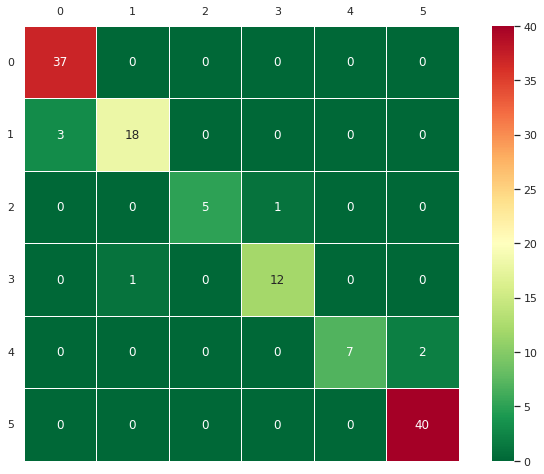

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.821     0.865     0.842        37
           1      0.611     0.524     0.564        21
           2      0.500     0.333     0.400         6
           3      0.667     0.769     0.714        13
           4      0.778     0.778     0.778         9
           5      0.976     1.000     0.988        40

    accuracy                          0.810       126
   macro avg      0.725     0.712     0.714       126
weighted avg      0.801     0.810     0.803       126



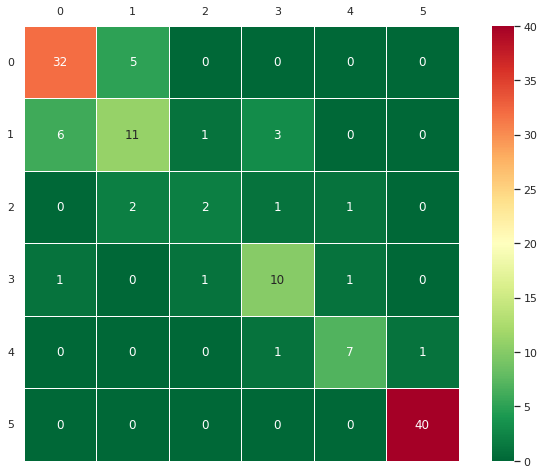

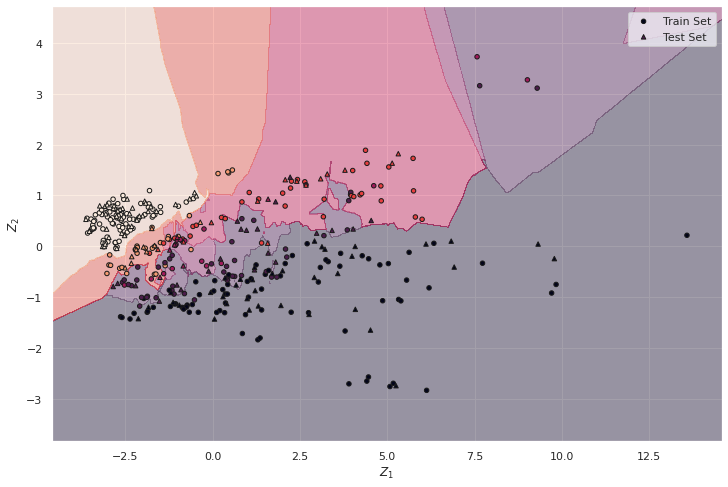

In [61]:
# Hyperparameter grid search for k
param_grid = {'n_neighbors': [2, 4, 8, 16, 32]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Find best k
knn_full_data = grid_search.fit(X_train, y_train)
knn_Z = grid_search.fit(Z_train, zy_train)
knn_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best k
print('Grid Search Results:')
k_full_data = knn_full_data.best_params_
k_Z = knn_Z.best_params_
k_Z12 = knn_Z12.best_params_
print(f'k_full_data: {k_full_data}\nk_Z: {k_Z}\nk_Z12: {k_Z12}')

# Apply best k
knn = KNeighborsClassifier(n_neighbors=k_full_data.get('n_neighbors'))
scores_knn_full_data = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
scores_knn_Z = cross_validate(knn, Z_train, zy_train, cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(knn, Z12_train, z12y_train, cv=5, scoring=scoring)

knn_scores_dict={}
for i in ['fit_time','test_f1_macro']:
  knn_scores_dict["knn_full_data " + i ] = scores_knn_full_data[i]
  knn_scores_dict["knn_Z  " + i ] = scores_knn_Z[i]
  knn_scores_dict["knn_Z12 " + i ] = scores_knn_Z12[i]

knn_scores_data = pd.DataFrame(knn_scores_dict).T
#knn_scores_data['avgs'] = knn_scores_data.mean(axis=1)
print(f'{knn_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  knn.fit(Xtr, ytr)
  y_pred = knn.predict(Xtst)
  knn_score = knn.score(Xtst, ytst)
  #print(f'\nTest Set Accuracy: {knn_score:.3f}')
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_knn = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_knn, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('KNN Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    # print(np.where(ytst != y_pred))

### Decision Trees (DT)

Grid Search Results:
depth_full_data: {'max_depth': 8}
depth_Z: {'max_depth': 8}
depth_Z12: {'max_depth': 8}
                                   0         1         2         3         4
dt_full_data fit_time       0.003379  0.003177  0.002879  0.002886  0.002893
dt_Z  fit_time              0.002168  0.002223  0.002178  0.002126  0.002172
dt_Z12 fit_time             0.001232  0.001207  0.001185  0.001192  0.001184
dt_full_data test_f1_macro  1.000000  0.985852  1.000000  0.967419  1.000000
dt_Z  test_f1_macro         0.819452  0.680244  0.754960  0.761815  0.888353
dt_Z12 test_f1_macro        0.694560  0.756093  0.615311  0.657338  0.714216

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        35
           1      1.000     1.000     1.000        20
           2      1.000     1.000     1.000         7
           3      1.000     1.000     1.000        15
           4      0.917     1.000     

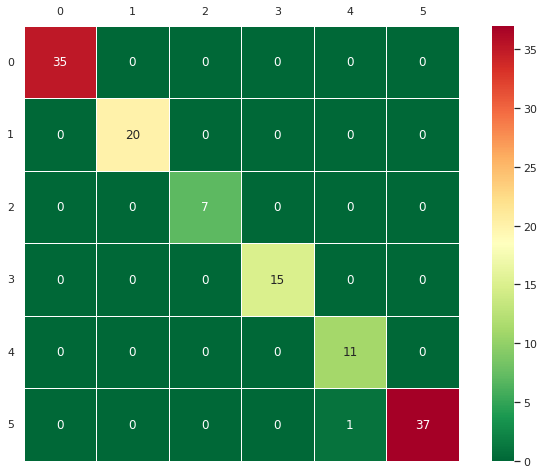

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.895     0.919     0.907        37
           1      0.875     0.667     0.757        21
           2      0.571     0.667     0.615         6
           3      0.688     0.846     0.759        13
           4      0.636     0.778     0.700         9
           5      0.947     0.900     0.923        40

    accuracy                          0.841       126
   macro avg      0.769     0.796     0.777       126
weighted avg      0.853     0.841     0.843       126



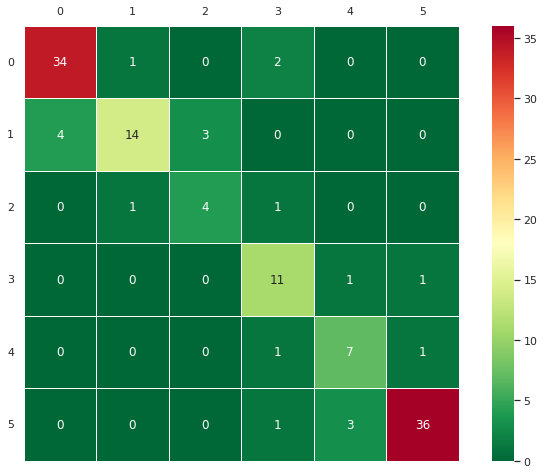

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.892     0.892     0.892        37
           1      0.650     0.619     0.634        21
           2      0.500     0.500     0.500         6
           3      0.500     0.615     0.552        13
           4      1.000     0.778     0.875         9
           5      1.000     1.000     1.000        40

    accuracy                          0.825       126
   macro avg      0.757     0.734     0.742       126
weighted avg      0.835     0.825     0.828       126



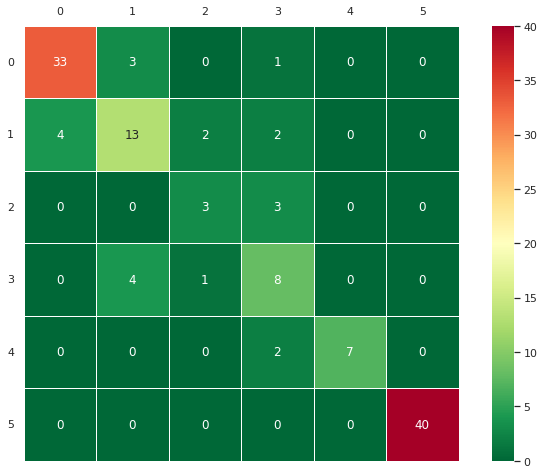

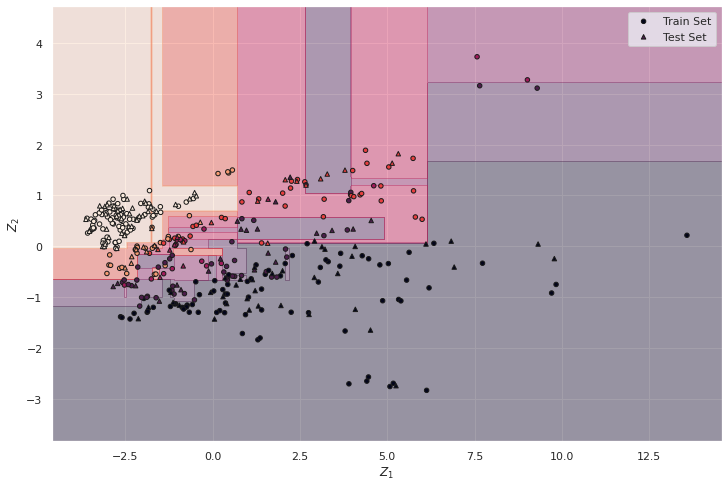

In [62]:
# Hyperparameter search for DT depth
param_grid = {'max_depth': [2, 4, 8, 16, 32, 64]}
dt = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Find best depth
dt_full_data = grid_search.fit(X_train, y_train)
dt_Z = grid_search.fit(Z_train, zy_train)
dt_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best tree depth
print('Grid Search Results:')
depth_full_data = dt_full_data.best_params_
depth_Z = dt_Z.best_params_
depth_Z12 = dt_Z12.best_params_
print(f'depth_full_data: {depth_full_data}\ndepth_Z: {depth_Z}\ndepth_Z12: {depth_Z12}')

# Apply best k
dt = DecisionTreeClassifier(max_depth=depth_full_data.get('max_depth'))
scores_dt_full_data = cross_validate(dt, X_train, y_train, cv=5, scoring=scoring)
scores_dt_Z = cross_validate(dt, Z_train, zy_train, cv=5, scoring=scoring)
scores_dt_Z12 = cross_validate(dt, Z12_train, z12y_train, cv=5, scoring=scoring)

dt_scores_dict={}
for i in ['fit_time', 'test_f1_macro']:
  dt_scores_dict["dt_full_data " + i ] = scores_dt_full_data[i]
  dt_scores_dict["dt_Z  " + i ] = scores_dt_Z[i]
  dt_scores_dict["dt_Z12 " + i ] = scores_dt_Z12[i]

dt_scores_data = pd.DataFrame(dt_scores_dict).T
#dt_scores_data['avgs'] = dt_scores_data.mean(axis=1)
print(f'{dt_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  dt.fit(Xtr, ytr)
  y_pred = dt.predict(Xtst)
  dt_score = dt.score(Xtst, ytst)
  #print(dt_score)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_dt = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_dt, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Decision Tree Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

## **ROC Curves**

DATASET: FULL DATA


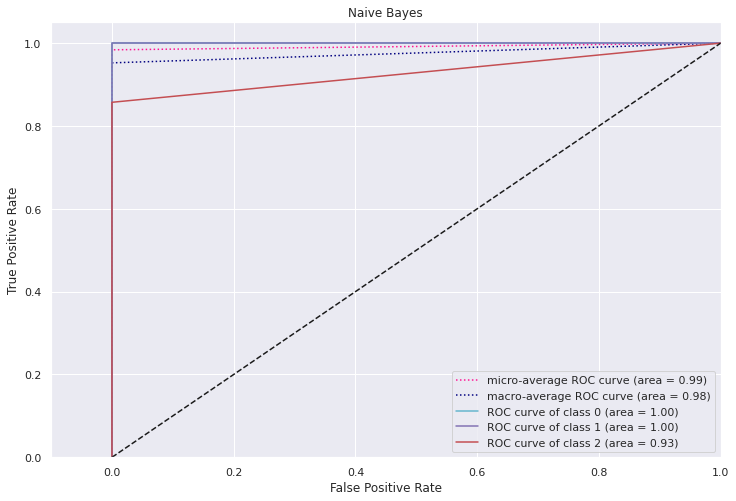

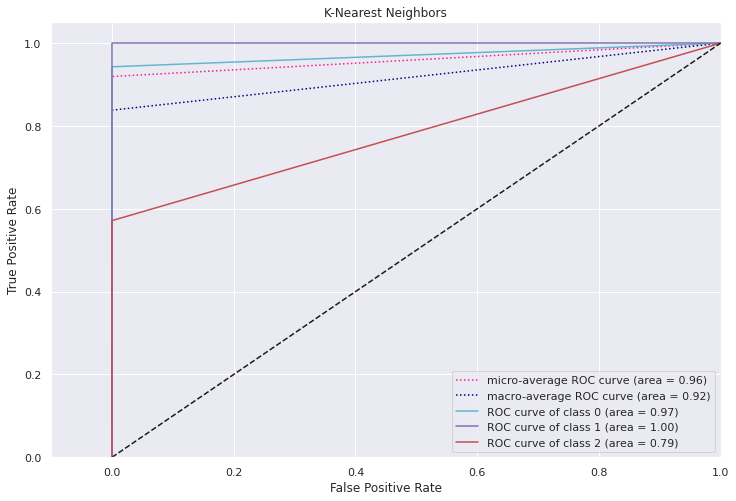

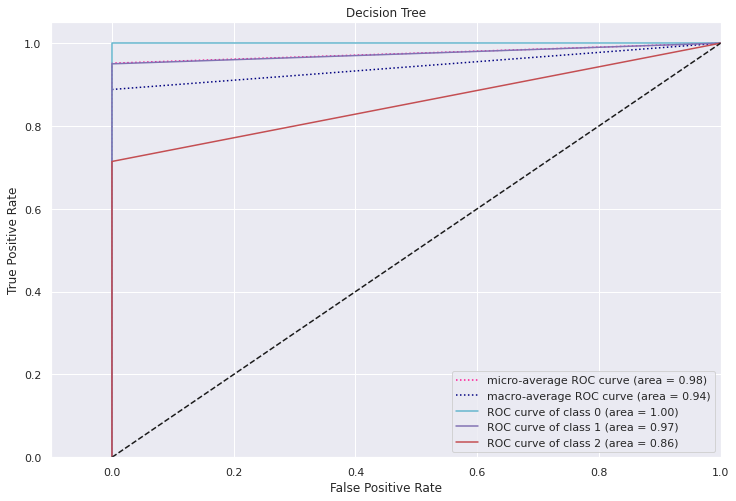

DATASET: Z


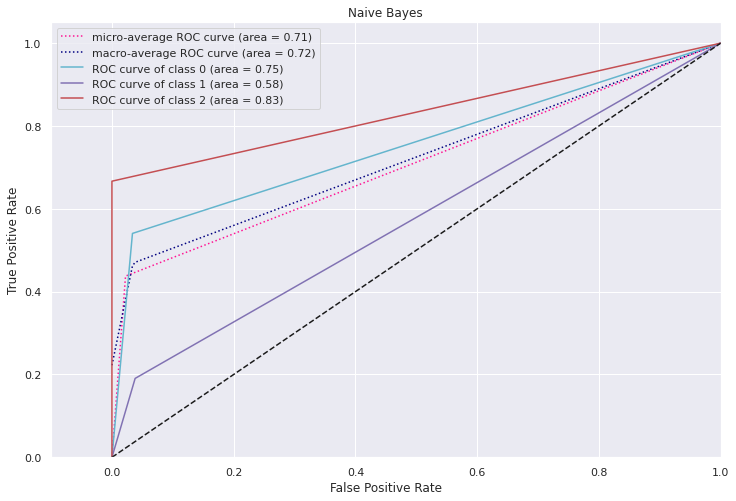

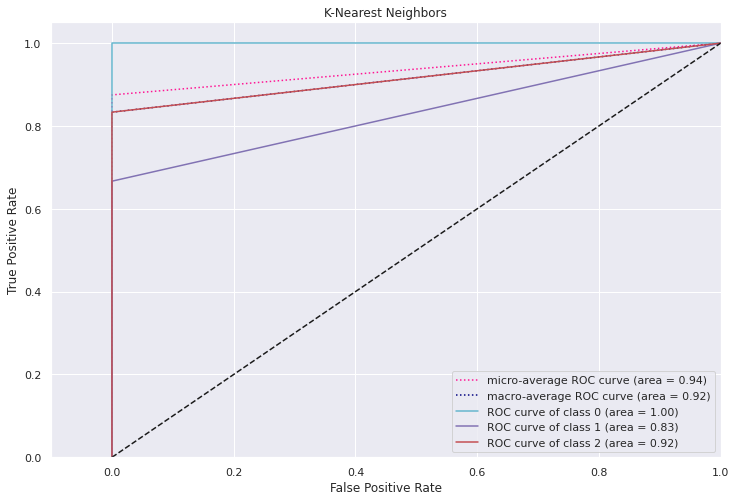

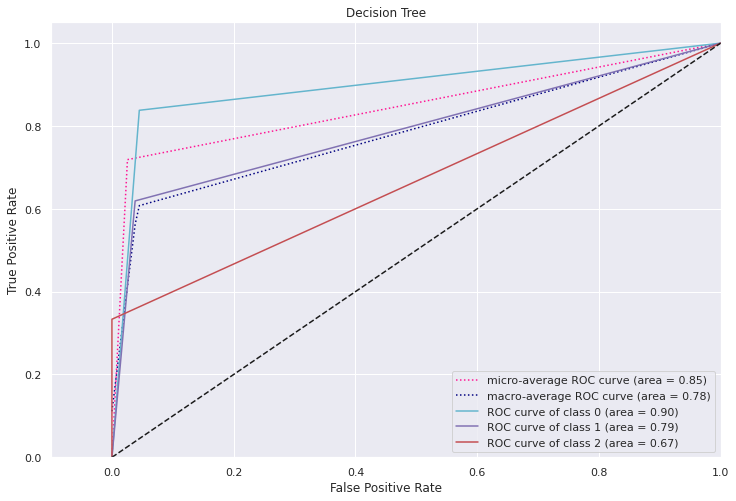

DATASET: Z12


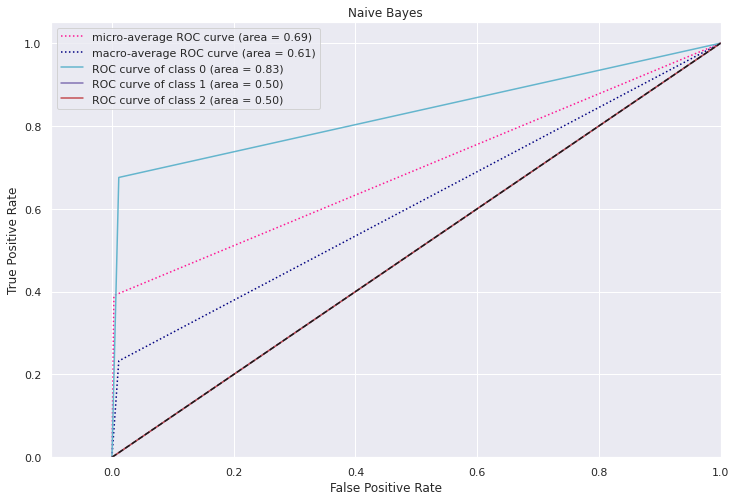

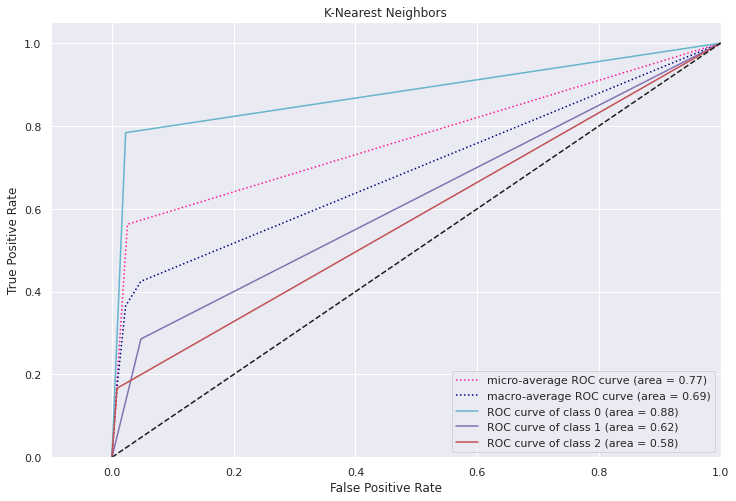

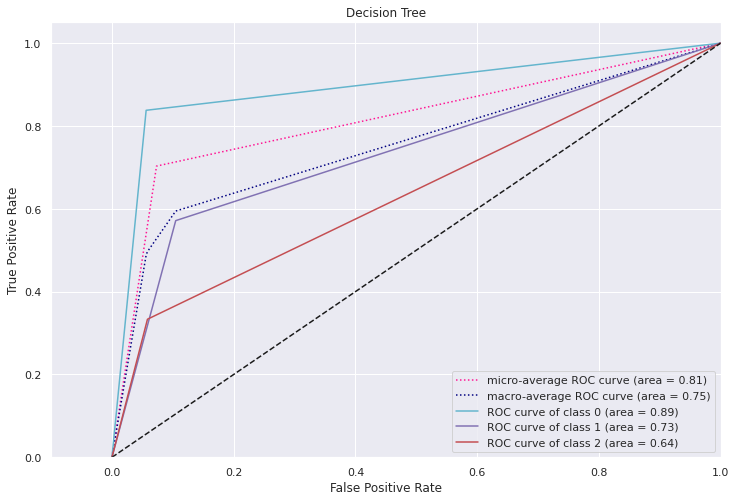

In [63]:
#ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, X_tr, y_tr, X_tst, y_tst) in enumerate(datasets):
  # Binarize the labels
  y_train = label_binarize(y_tr, classes=[0, 1, 2])
  y_test = label_binarize(y_tst, classes=[0, 1, 2])
  n_classes = y_train.shape[1]
  print(f'DATASET: {name}')

  list_algos = [gnb, knn, dt]
  algo_name = ['Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree']
  for i, (algo, algo_name) in enumerate(zip(list_algos, algo_name)):
    classifier = OneVsRestClassifier(algo)
    y_pred = classifier.fit(X_tr, y_train).predict(X_tst)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i], drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel(), drop_intermediate=False)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig, ax = plt.subplots()

    plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})', color="deeppink", linestyle=':')
    plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})', color="navy", linestyle=':')

    colors = cycle(['c', 'm', 'r'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i], color=color,label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{algo_name}')
    plt.legend()
    plt.show()

## **Bar Chart Plot**

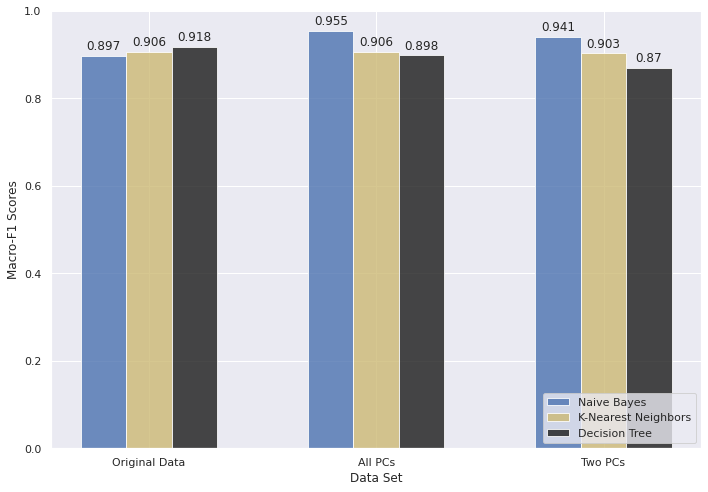

In [64]:
# ADAPTED FROM: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
def autolabel(rects):
    for r in rects:
        height = r.get_height()
        ax.annotate(f'{height}', xy=(r.get_x() + r.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

n_groups = 3
ind = np.arange(n_groups)

# F1 Scores from above
NB = (0.897, 0.955, 0.941)
KNN = (0.906, 0.906, 0.903)
DT = (0.918, 0.898, 0.870)

# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, NB, bar_width, alpha=opacity, color='b', label='Naive Bayes')
rects2 = plt.bar(index + bar_width, KNN, bar_width, alpha=opacity, color='y', label='K-Nearest Neighbors')
rects3 = plt.bar(index + bar_width*2, DT, bar_width, alpha=opacity, color='k', label='Decision Tree')

ax.set_xlabel('Data Set')
ax.set_ylabel('Macro-F1 Scores')
#plt.title(f'')
plt.xticks(index + bar_width, ('Original Data', 'All PCs', 'Two PCs'))
plt.legend(loc="lower right")

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()